Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# TD2 - Fast Fourier Transform

## Exercice 0: tutoriel

Explorer avec attention le fichier Exemple.ipynb. N'hésitez pas à modifier des valeurs et à poser des questions.

## Exercice 1 : signal sinusoïdal 

On souhaite estimer de manière numérique le module carré de la transformée de Fourier (TF) d'un signal sinusoïdal de vecteur d'onde ou pulsation $q_0$ : 
$$f(x) = \sin(q_0 x)$$

* Définir une fonction $\texttt{pow}\_\texttt{fft}\_\texttt{1D}\_\texttt{prelim}(x, y)$, avec $y$ et $x$ numpy arrays (tels que y=f(x)), renvoyant les numpy arrays contenant $q$ et le module au carré de la TF , $|\hat f(q)|^2$. On pourra étudier la documentation associée ( https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html ), en particulier les fonctions $\texttt{np.ftt.fft}$ et la fonction $\texttt{np.fft.fftfreq}$. On normalisera la TF à son maximum (i.e. on fera en sorte que max(TF)=1).
* En prenant $q_0=5$, superposer sur deux graphiques séparés :
  * $f(x)$ obtenu 
      * pour $x\in[0,10]$ avec un pas $\delta x = 0.1$, 
      * pour $x\in[0,10]$ avec pas $\delta x = 0.01$, 
      * pour $x\in[0,20]$ avec pas $\delta x = 0.1$.
  * $\hat f(q)$ obtenus dans ces trois configurations.
* Imprimer à l'écran la résolution sur le vecteur d'onde $q$ ainsi que sa valeur maximale accessible et vérifier la cohérence avec vos attentes.

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def pow_fft_1D_prelim(x,y) :
    tf_nu = np.fft.fft(y, norm = 'ortho')
    nu = np.fft.fftfreq(x.size, d=x[1]-x[0])
    psd = np.abs(tf_nu)**2
    psd= psd/max(psd)
    return nu, psd
    

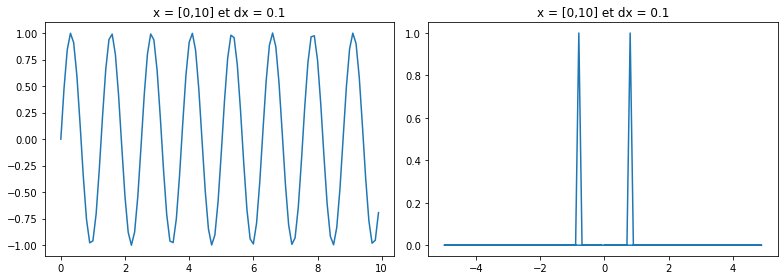

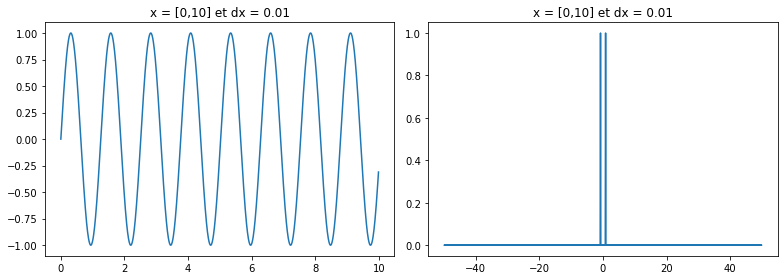

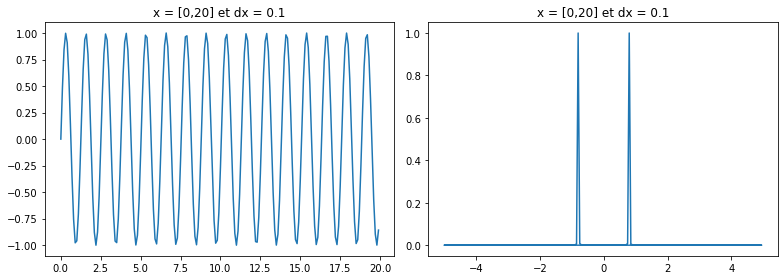

In [23]:
def f(x, qo):
    return np.sin(qo*x)


for i in [[10, 0.1],[10,0.01],[20,0.1]]:
    
    x= np.arange(0,i[0], i[1])
    y= f(x,5)

    nu,psd = pow_fft_1D_prelim(x,y)

    fig = plt.figure(figsize = (11, 4))
    plt.subplot(121)
    plt.plot(x,y)
    plt.title(f'x = [0,{i[0]}] et dx = {i[1]}')

    plt.subplot(122)
    plt.plot(nu,psd)
    plt.title(f'x = [0,{i[0]}] et dx = {i[1]}')


    plt.tight_layout()

    plt.show()


* Afficher à l'écran les valeurs prises par le vecteur d'onde $q$ pour $x \in [0,10]$ par pas $\delta x = 1$.
* Créer une fonction  $\texttt{pow}\_\texttt{fft}\_\texttt{1D}(x, y)$ en tout point identique à la précédente mais qui cette fois réordonne les termes de $q$ et $\hat f(q)$. On pourra utiliser la fonction $\texttt{np.fft.fftshift}$.
* Tester cette fonction dans les trois configurations précédentes

In [21]:
x= np.arange(0,10, 1)
y= f(x,5)

nu,psd = pow_fft_1D_prelim(x,y)
print(nu)

[ 0.   0.1  0.2  0.3  0.4 -0.5 -0.4 -0.3 -0.2 -0.1]


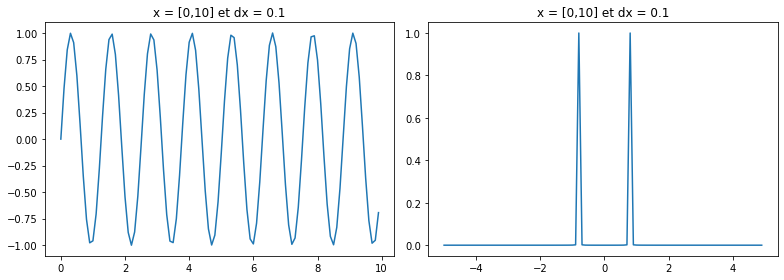

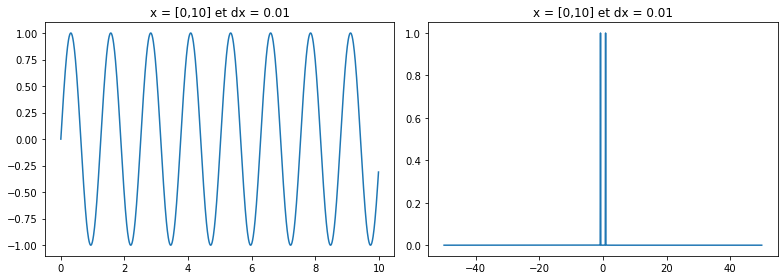

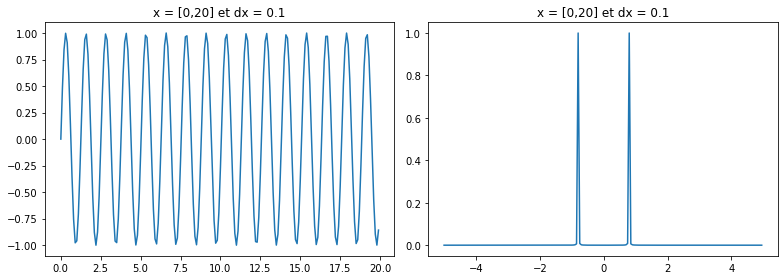

In [144]:
def pow_fft_1D(x,y) :
    tf_nu = np.fft.fft(y, norm = 'ortho')
    nu = np.fft.fftfreq(x.size, d=x[1]-x[0])
    psd = np.abs(tf_nu)**2
    psd = np.fft.fftshift(psd)
    psd= psd/max(psd)
    nu = np.fft.fftshift(nu)
    return nu, psd

for i in [[10, 0.1],[10,0.01],[20,0.1]]:
    
    x= np.arange(0,i[0], i[1])
    y= f(x,5)

    nu,psd = pow_fft_1D(x,y)

    fig = plt.figure(figsize = (11, 4))
    plt.subplot(121)
    plt.plot(x,y)
    plt.title(f'x = [0,{i[0]}] et dx = {i[1]}')

    plt.subplot(122)
    plt.plot(nu,psd)
    plt.title(f'x = [0,{i[0]}] et dx = {i[1]}')


    plt.tight_layout()

    plt.show()

# Exercice 2 : traitement d'un signal 1D

On cherche à extraire le signal sinusoïdal caché dans un signal bruité, via un traitement sur la transformée de Fourier de ce dernier.

* Générer un signal sinusoïdal de pulsation $q_0=5$ pour $x\in [0,20]$. Un grand nombre d'échantillon pour $x$ est recommandé.
* Rajouter un signal parasite, que l'on prendra sinusoïdal de pulsation $q_b=100$
* Tracer les courbes temportelles et les spectres de puissance du bruit, du signal pur et du signal bruité

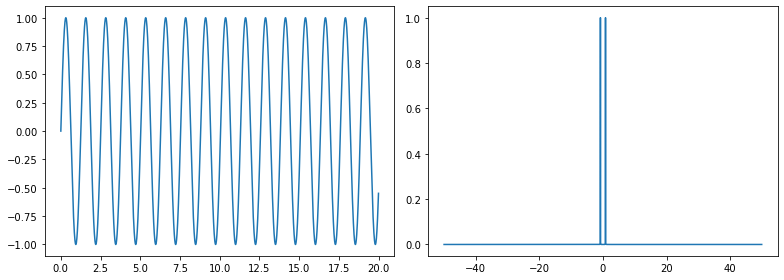

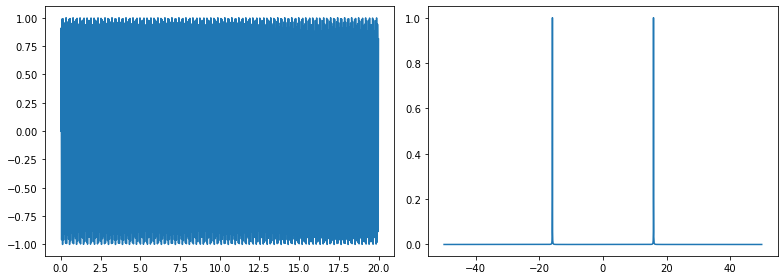

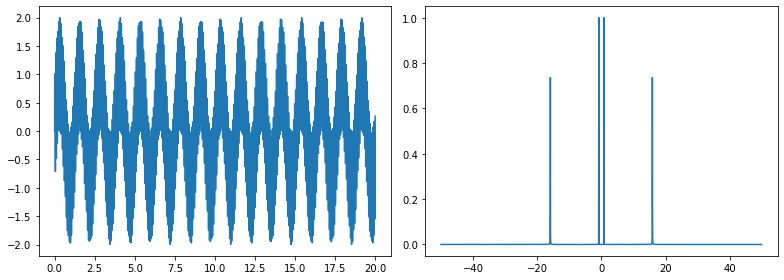

In [123]:
x= np.arange(0,20, 0.01)
y_s= f(x,5)
y_b = f(x,100)
y_f = y_s+y_b

for i in [y_s, y_b, y_f]:
    y= i

    nu,psd = pow_fft_1D(x,y)

    fig = plt.figure(figsize = (11, 4))
    plt.subplot(121)
    plt.plot(x,y)

    plt.subplot(122)
    plt.plot(nu,psd)



    plt.tight_layout()

    plt.show()

* Sur la **transformée de Fourier** du spectre (et non le spectre de puissance), appliquer une transformation permettant de se débarasser du bruit parasite. Visualiser le résultat du filtrage sur la transformée de Fourier inverse.

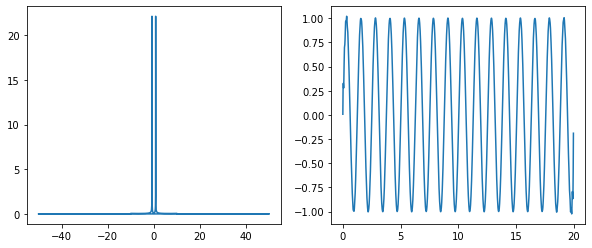

In [124]:
tf_nu = np.fft.fft(y_f, norm = 'ortho')
nu = np.fft.fftfreq(x.size, d=x[1]-x[0])


tf_nu_db = tf_nu

for i in range(len(nu)):
    if np.abs(nu[i])> 10:
        tf_nu_db[i]=0

y_db = np.fft.ifft(tf_nu_db, norm = 'ortho')

fig = plt.figure(figsize=(10,4))
plt.subplot(121)

plt.plot(nu,np.abs(tf_nu_db))

plt.subplot(122)
plt.plot(x,y_db.real)
plt.show()



* Recommencer avec un bruit qui est cette fois générer avec `np.random.random`, d'amplitude grande et à la fois négatif et positif.

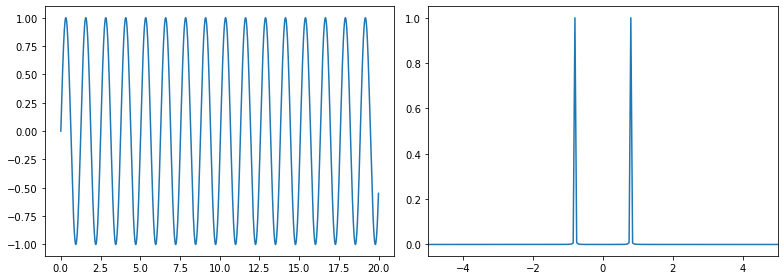

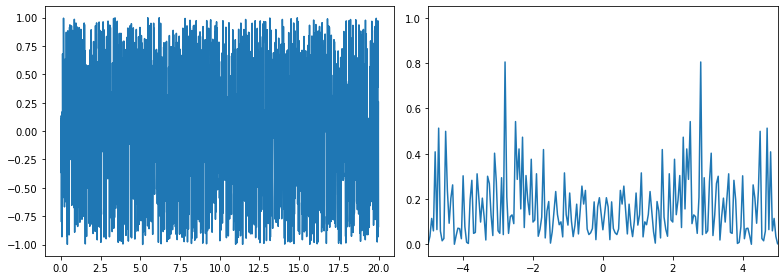

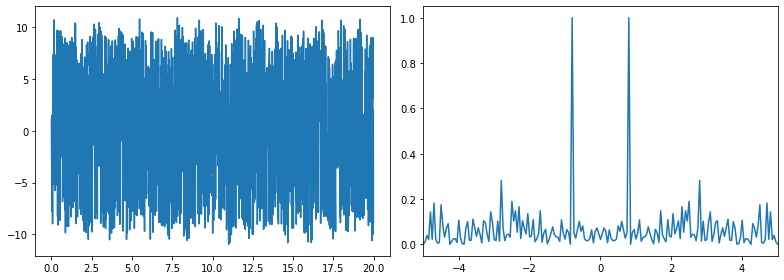

In [125]:
bruit = np.random.uniform(-1,1,x.size)

x= np.arange(0,20, 0.01)
y_s= f(x,5)

y_f = y_s+bruit*10

for i in [y_s, bruit, y_f]:
    y= i

    nu,psd = pow_fft_1D(x,y)

    fig = plt.figure(figsize = (11, 4))
    plt.subplot(121)
    plt.plot(x,y)

    plt.subplot(122)
    plt.plot(nu,psd)
    plt.xlim((-5,5))



    plt.tight_layout()

    plt.show()


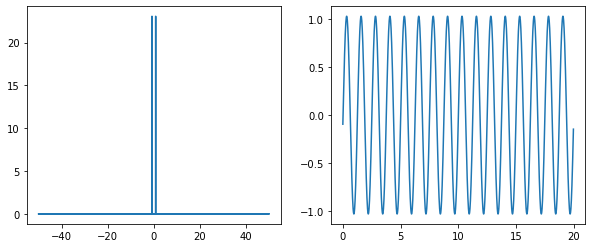

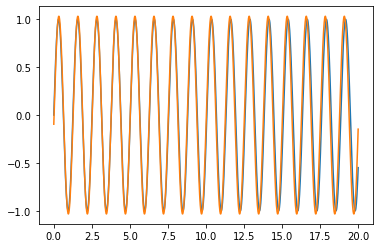

In [127]:
tf_nu = np.fft.fft(y_f, norm = 'ortho')
nu = np.fft.fftfreq(x.size, d=x[1]-x[0])


tf_nu_db = tf_nu

for i in range(len(tf_nu)):
    if np.abs(tf_nu[i])< 20:
        tf_nu_db[i]=0

y_db = np.fft.ifft(tf_nu_db, norm = 'ortho')

fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(nu,np.abs(tf_nu_db))

plt.subplot(122)
plt.plot(x,y_db.real)
plt.show()


fig= plt.figure()
plt.plot(x,y_s)
plt.plot(x,y_db.real)
plt.show()

## Exercice 3 : Chaîne linéaire d'atomes

On souhaite comparer la formule analytique de l'intensité lumineuse diffractée par une chaîne d'atomes à la TF calculée de manière numérique. Cette technique d'analyse permet, par l'analyse de la figure de diffraction, de retrouver la configuration géométrique des atomes.

On définit la chaîne linéaire de $n$ atomes espacés d'une longueur $a$ par:
$$ f(x) = \sum_{j=1}^{n} \exp\left(-\frac{(x-j a)^2}{2\sigma^2}\right) $$
où chaque atome est modélisé individuellement par une Gaussienne de largeur $\sigma$.

On peux montrer que l'intensité diffractée par une telle chaîne linéaire s'écrit en fonction du vecteur d'onde $q$ comme :
$$ I(q) \propto | \hat f(q) |^2 \propto {\rm e}^{-q^2\sigma^2}\ \frac{1-\cos qna}{1-\cos qa} $$

* Pour $n = 4$, $a = 10$, $\sigma =1$ (pour des atomes $a$ et $\sigma$ sont en nm), tracer :
 * le profil de densité de la chaine atomique
 * sur un même graphique la fonction $I(q)$ obtenue de manière analytique (formule ci-dessus) et de manière numérique (à l'aide de $\texttt{pow}\_\texttt{fft}\_\texttt{1D})$

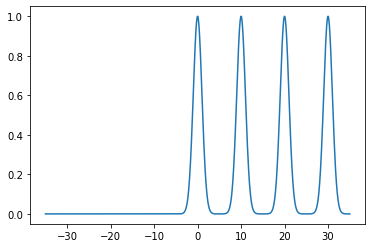

In [147]:
def f_a(x,n=4,a=10,sig = 1):
    s=0
    for j in range(n):
        s= s+ np.exp(-(x-j*a)**2/(2*sig**2))
    return s

x = np.linspace(-35,35,1000)
y=f_a(x)

fig = plt.figure()

plt.plot(x,y)
plt.show()

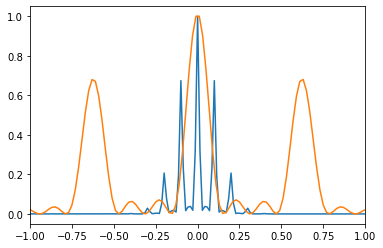

In [146]:
def In(q,n=4,a=10,sig=1):
    return np.exp(-(q**2*sig**2)) * (1-np.cos(q*a*n)) / (1-np.cos(q*a))

q_num,psd_num = pow_fft_1D(x,y)
q_a=np.linspace(-10,10,1000)

I = In(q_a)
I=I/max(I)

fig = plt.figure()

plt.plot(q_num,psd_num)
plt.plot(q_a,I)
plt.xlim((-1,1))
plt.show()

 Si les deux courbes se superposent, c'est que vous savez utiliser correctement le module de TF à 1D ! Sinon... creusez avant d'attaquer la suite.

* Faîtes varier $n$, $a$ et $\sigma$ dans la cellule précédente. Quel est l'impact de chacun de ces paramètres sur l'intensité diffractée ?

LA REPONSE ICI (double-clique pour editer la cellule)

## Exercice 4 : Intensité 2D diffractée par un seul atome

* Définir une fonction $\texttt{pow}\_\texttt{fft}\_\texttt{2D}(\texttt{x, y, z})$, où $z=f(x,y)$, renvoyant le module au carré de la TF $\hat f(q) = \texttt{tfz}$, et les coordonnées $q_x, q_y$ associées sous la forme $\texttt{qx, qy, tfz}$. On pourra utiliser la fonction $\texttt{np.fft.fft2}$. On normalisera la TF à son maximum (i.e. on fera en sorte que max(TF)=1) et on fera attention à l'ordre des composantes via l'utilisation de la fonction $\texttt{np.fft.fftshift}$.

On va tester cette fonction sur une simple Gaussienne 2D pour commencer.

* Afficher dans l'espace direct une Gaussienne 2D centrée sur (0,0) et de largeur $\sigma_x = 1$ et $\sigma_y = 1$. On pourra définir $x \in [-16\sigma_x; 16\sigma_x]$ et $y \in [-16\sigma_y; 16\sigma_y]$ avec un échantillonage de 128 points selon chaque axe.
* Afficher la TF de cette Gaussienne 2D

**Astuces:** On pourra utliser la fonction `pcolor` de pyplot pour le tracé de cartes 2D. Pour éviter une distortion de l'aspect largeur/hauteur de l'image, on pourra utiliser:
```
fig, ax = plt.subplots()
ax.set_aspect(1)
```

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

## Exercice 5 : Diffraction par un réseau bidimensionnel d'atomes

On considère une surface d'atomes identiques répartis sur un réseau carré. Ce réseau est la répétition 2D d'une maille carrée de côté de longueur a (comme en figure ci dessous).

<img style="float:center;" src="plots/carre.png" alt="drawing" width="300"/>

Dans la suite, on considère une surface d'atomes constituée de $m \times m$ mailles ($m$ entier ≥ 1). Dans le cas d'un réseau carré simple illustré ci-dessus, la surface contient $m^2$ atomes (1 atome par maille). À chaque atome $i$ de la surface, on attribue une distribution de charge Gaussienne symétrique (i.e. de même largeur selon les deux axes) centrée en $\vec{r_{{\rm at,}i}} = (x_{{\rm at,}i}$, $y_{{\rm at,}i})$. La densité de charge de toute la surface est la somme des densités de charge dues à chaque atome.

On souhaite construire la densité de charge du système à l'aide de deux fonctions : (i) une fonction qui définit les positions $\vec{r_{{\rm at,}i}}$ des atomes sur la surface (de taille $m^2 a^2$) ; (ii) une fonction qui calcule la somme des densités atomiques, compte-tenu des positions $\vec{r_{{\rm at,}i}}$.

* Écrire une fonction $\texttt{make}\_\texttt{reseau}(m,a)$ retournant les positions $\vec{r_{{\rm at,}i}}$ des atomes, soit  $x_{{\rm at,}i} = n_1 \times a$ et $y_{{\rm at,}i} = n_2 \times a$, pour $n_1, n_2 \in [0, m-1]$. On pourra décaler l'origine, e.g. de $0.25a$, pour que la densité de charge atomique ne soit pas tronquée. On pourra par exemple utiliser $\texttt{meshgrid}$ pour créer la grille et $\texttt{flatten}$ pour retourner des listes 1D.
* Tester cette fonction

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

* Écrire une fonction $\texttt{make}\_\texttt{dens}(x, y, \texttt{func}\_\texttt{densite}, x_{\rm at},y_{\rm at})$, qui calcule la somme des densités de charge des atomes aux positions $\texttt{x, y}$ ($\texttt{x}$ et $\texttt{y}$ étant des numpy arrays). Chaque atome possède une densité de charge donnée par la fonction $\texttt{func}\_\texttt{densite}$, centrée aux coordonnées $\texttt{xat[i], yat[i]}$, où $\texttt{xat, yat}$ sont des numpy arrays.
* Tester cette fonction en affichant une carte de densité de charge pour une distribution individuelle de charge Gaussienne de largeur $\sigma=0.4\,\overset{\circ}{A}$ (symbole latex $\texttt{\AA}$), et $4\times4$ atomes situés sur une maille carrée de paramètre de maille $a=5\,\overset{\circ}{A}$.
* Tracer la figure de diffraction obtenue pour cette distribution de charges  en utilisant $\texttt{pow}\_\texttt{fft}\_\texttt{2D}$

*Indices: voici à quoi peuvent ressembler le réseau atomiques demandé et sa figure de diffraction:*
<table> <tr>
<td> <img style="float:left;" src="plots/51_densite.png" width="300px"/> </td>
<td> <img style="float:right;" src="plots/51_diffraction.png" width="300px"/> </td>
</tr> </table>


In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

Commenter la figure en s'appuyant sur l'exemple 1D étudié dans l'exercice précédent.

LA REPONSE ICI (double-clique pour editer la cellule)

Les taches observées définissent le réseau réciproque du réseau carré d'atomes. Quelle est la géométrie du réseau réciproque ? Donner la valeur du paramètre de maille du réseau réciproque. Est-il conforme à ce que vous attendiez ?

LA REPONSE ICI (double-clique pour editer la cellule)

Quelle est la forme attendue pour ces taches, appelées nœuds du réseau réciproque ? Comment pourrait-on améliorer la "résolution sur ces tâches" ?

LA REPONSE ICI (double-clique pour editer la cellule)

Effectuer des simulations pour plusieurs valeurs de m (m = 2, 3, 4, etc). Quelle inﬂuence la taille du système a-t-elle sur la figure de diffraction ?

LA REPONSE ICI (double-clique pour editer la cellule)

On indique que σ représente le désordre dû à l'agitation thermique. Augmenter σ et commenter la figure obtenue.

LA REPONSE ICI (double-clique pour editer la cellule)

* Écrire une nouvelle fonction $\texttt{make_reseau2}$ pour construire cette fois-ci un réseau carré centré (voir figure ci dessous). Un atome supplémentaire est situé au milieu du carré, donc la maille
contient maintenant deux atomes.

<img style="float:center;" src="plots/carre_centre.png" alt="drawing" width="300"/>

* Tester cette fonction en affichant une carte de densité de charge.
* Tracer la figure de diffraction obtenue pour cette distribution de charges.


*Indices: voici à quoi peuvent ressembler le réseau atomiques demandé et sa figure de diffraction:*
<table> <tr>
<td> <img style="float:left;" src="plots/52_densite.png" width="300px"/> </td>
<td> <img style="float:right;" src="plots/52_diffraction.png" width="300px"/> </td>
</tr> </table>


In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

En notant que le réseau construit peut aussi être vu comme un réseau
carré simple de paramètre de maille $a\sqrt{2}/2$ tourné de 45°, comparer la figure de diffraction obtenue avec celle du réseau cubique simple.

LA REPONSE ICI (double-clique pour editer la cellule)

* Écrire une nouvelle fonction $\texttt{make_reseau3}$ pour construire cette fois-ci un réseau où les deux atomes de la maille sont rapprochés (voir figure ci dessous). 

<img style="float:center;" src="plots/carre_apparie.png" alt="drawing" width="300"/>

* Tester cette fonction en affichant une carte de densité de charge. On pourra considérer une distance entre atomes "appariés" de $a/5$.
* Tracer la figure de diffraction obtenue pour cette distribution de charges.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

* Commenter la figure de diffraction obtenue

LA REPONSE ICI (double-clique pour editer la cellule)

## Exercice 6 : Cas de la surface (001) du silicium cristallin

Le but de ce ce dernier exercice est d'interpréter, en s'aidant des simulations précédentes et en effectuant de nouvelles simulations, un cliché expérimental de diffraction d'électrons lents de la surface (001) du silicium cristallin (voir figure ci dessous). La diffraction d'électrons lents permet de voir la structure cristallographique des atomes de surface, mais pas uniquement : du fait de la profondeur de pénétration des électrons, des taches provenant de la diffraction par les atomes de volume apparaissent également sur le cliché.

<img style="float:center;" src="plots/LEED.jpg" alt="drawing" width="300"/>

<h3><center>
Cliché de diffraction LEED (Low Energy Electron Diffraction) enregistré pour la surface (001) d'un monocristal de silicium. Le faisceau d'électrons incident a une énergie de 100 eV, ce qui correspond à une longueur d'onde de l'ordre de deux angstroms. L'échelle sur la figure indique une distance correspondant à 2 A$^{-1}$.
</center></h3>

Le silicium cristallise dans un réseau cubique à faces centrées (a = 5,43 A). Cela signifie que si un atome de Si est situé en l'origine du réseau cubique, (0,0,0), trois autres atomes de Si se trouvent aux centres des faces du cube se rencontrant à l'origine, i.e. en (0,a/2,a/2), (a/2,0,a/2) et (a/2,a/2,0). Dans le silicium cristallin, les atomes occupent par ailleurs un autre site cristallographique en (a/4,a/4,a/4), comme indiqué en figure ci-dessous (4 + 6/2 + 8/8 = 8 atomes par maille).

<img style="float:center;" src="plots/SiCristallo.jpg" alt="drawing" width="300"/>

D'après la structure cristallographique du volume, la surface (001) du silicium (i.e. vue depuis le dessus) a une géométrie cubique centrée comme illustré ci-dessous.

<img style="float:center;" src="plots/SiCoupe.jpg" alt="drawing" width="300"/>


On souhaite à l'aide des simulations précédentes, déterminer la figure de diffraction de la surface du silicium (surface dite non reconstruite) à laquelle on s'attend. 

* Refaire une simulation avec le paramètre de maille du silicium et la comparer à l'image LEED : quelle est la distance entre deux taches voisines ? 
* Identifier les taches dues à la diffraction par les atomes de volume sur l'image LEED.

LA REPONSE ICI (double-clique pour editer la cellule)

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

En réalité, un monocristal de silicium subit en surface ce qu'on appelle une reconstruction. L'atome de silicium a quatre électrons de valence (\[Ne\]3s^2 3p^2) qui s'apparient avec les électrons de valence des atomes voisins. Les atomes de volume sont ainsi dans des sites tétraédriques. En surface, des liaisons ont été "coupées" et, sans reconstruction, des électrons restent non-appariés. Pour stabiliser la structure, les atomes de surface se rapprochent deux à deux pour former des dimères, que l'on peut voir sur les images STM (Scanning Tunneling Microscopy) présentées sur la figure ci dessous. 

<img style="float:center;" src="plots/STM1.jpg" alt="drawing" width="300"/>
<h3><center>
Image STM de la surface (001) du silicium cristallin. On distingue ici deux domaines (la taille de l'image est de l'ordre 20 nm × 20 nm). Ceci s'explique par le fait que la surface d'un monocristal n'est pas rigoureusement plane : elle est constituée de marches. On observe donc deux couches successives sur cette image.
</center></h3>
<img style="float:center;" src="plots/STM2.jpg" alt="drawing" width="300"/>
<h3><center>
Zoom sur un des deux domaines. Les taches blanches sont les atomes associés en dimères.
</center></h3>
Cette reconstruction modifie la géométrie de la surface et conduit à une maille deux fois plus grande dans une des deux directions (maille 2×1) par rapport à la maille primitive carrée non centrée, puis à une rotation de 45$^\circ$.

* Identifier par des simulations appropriées les taches provenant de chacun des deux domaines.

LA REPONSE ICI (double-clique pour editer la cellule)

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()